### Three obervations from the data

1) The cities closer to the equator had higher temps on average then cities further from the equator.

2) The data shows a slight increase in humidity near the equator.

3) The data doesnt suggest any correlation to locations near the equator having greater wind speeds.


In [27]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [30]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""
Beginning Data Retrieval     
-----------------------------
""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    city_data = []
    query_url = f'{url}appid={api_key}&q={city}'
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        city_data.append(k_to_f(weather_response["main"]["temp_max"]))   # Append Max Temp
        city_data.append(weather_response["main"]["humidity"])           # Append Hummidity
        city_data.append(weather_response["clouds"]["all"])   # Append Cloudiness
        city_data.append(weather_response["wind"]["speed"])              # Append Wind Speed
        city_data.append(weather_response["sys"]["country"])             # Append Country
        city_data.append(weather_response["dt"])                         # Append Date
        # Append city data to full data
        results.append(city_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 614 | trelew
Processing Record 2 of 614 | ushuaia
Processing Record 3 of 614 | goundam
Processing Record 4 of 614 | butaritari
Processing Record 5 of 614 | taolanaro
taolanaro not found. Skipping...
Processing Record 6 of 614 | rikitea
Processing Record 7 of 614 | puerto ayora
Processing Record 8 of 614 | ruatoria
ruatoria not found. Skipping...
Processing Record 9 of 614 | anyang
Processing Record 10 of 614 | lethem
Processing Record 11 of 614 | hobyo
Processing Record 12 of 614 | talnakh
Processing Record 13 of 614 | punta arenas
Processing Record 14 of 614 | busselton
Processing Record 15 of 614 | hithadhoo
Processing Record 16 of 614 | batagay-alyta
Processing Record 17 of 614 | novoagansk
Processing Record 18 of 614 | ingleside
Processing Record 19 of 614 | barrow
Processing Record 20 of 614 | kokopo
Processing Record 21 of 614 | leningradskiy
Processing Record 22 of 614 | ambon
Processing Record 

Processing Record 191 of 614 | jardim
Processing Record 192 of 614 | aripuana
Processing Record 193 of 614 | pacific grove
Processing Record 194 of 614 | cidreira
Processing Record 195 of 614 | klaksvik
Processing Record 196 of 614 | abai
Processing Record 197 of 614 | tumannyy
tumannyy not found. Skipping...
Processing Record 198 of 614 | bengkulu
Processing Record 199 of 614 | molagavita
Processing Record 200 of 614 | nata
Processing Record 201 of 614 | flinders
Processing Record 202 of 614 | ambilobe
Processing Record 203 of 614 | grindavik
Processing Record 204 of 614 | tingrela
tingrela not found. Skipping...
Processing Record 205 of 614 | belushya guba
belushya guba not found. Skipping...
Processing Record 206 of 614 | novikovo
Processing Record 207 of 614 | korla
Processing Record 208 of 614 | roebourne
Processing Record 209 of 614 | aklavik
Processing Record 210 of 614 | nanortalik
Processing Record 211 of 614 | deputatskiy
Processing Record 212 of 614 | phnum penh
phnum penh n

Processing Record 378 of 614 | grand haven
Processing Record 379 of 614 | namibe
Processing Record 380 of 614 | ndele
Processing Record 381 of 614 | padang
Processing Record 382 of 614 | mangrol
Processing Record 383 of 614 | tshela
Processing Record 384 of 614 | port hawkesbury
Processing Record 385 of 614 | hasaki
Processing Record 386 of 614 | sungaipenuh
Processing Record 387 of 614 | male
Processing Record 388 of 614 | itarema
Processing Record 389 of 614 | talara
Processing Record 390 of 614 | prince rupert
Processing Record 391 of 614 | contamana
Processing Record 392 of 614 | umzimvubu
umzimvubu not found. Skipping...
Processing Record 393 of 614 | lumut
Processing Record 394 of 614 | evensk
Processing Record 395 of 614 | burnie
Processing Record 396 of 614 | kieta
Processing Record 397 of 614 | yelizovo
Processing Record 398 of 614 | huntsville
Processing Record 399 of 614 | skiros
skiros not found. Skipping...
Processing Record 400 of 614 | kidal
Processing Record 401 of 614 

Processing Record 571 of 614 | celestun
Processing Record 572 of 614 | ambodifototra
ambodifototra not found. Skipping...
Processing Record 573 of 614 | port lincoln
Processing Record 574 of 614 | greymouth
Processing Record 575 of 614 | verkhnyaya balkariya
Processing Record 576 of 614 | yeppoon
Processing Record 577 of 614 | sisimiut
Processing Record 578 of 614 | ballitoville
Processing Record 579 of 614 | custodia
Processing Record 580 of 614 | angra
angra not found. Skipping...
Processing Record 581 of 614 | ostrovnoy
Processing Record 582 of 614 | marcona
marcona not found. Skipping...
Processing Record 583 of 614 | mandalgovi
Processing Record 584 of 614 | broome
Processing Record 585 of 614 | funtua
Processing Record 586 of 614 | pimenta bueno
Processing Record 587 of 614 | yar-sale
Processing Record 588 of 614 | buqayq
buqayq not found. Skipping...
Processing Record 589 of 614 | vestbygda
vestbygda not found. Skipping...
Processing Record 590 of 614 | taltal
Processing Record 

In [31]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)

In [32]:
# Export into csv 
df.to_csv(output_data_file, index=False)

# show dataframe 
df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trelew,-43.25,-65.31,64.256,31,45,6.80,AR,1596488469
1,ushuaia,-54.80,-68.30,46.670,65,40,5.70,AR,1596488401
2,goundam,16.41,-3.67,84.236,62,100,9.89,ML,1596488177
3,butaritari,3.07,172.79,82.904,74,2,8.08,KI,1596488470
4,rikitea,-23.12,-134.97,73.760,83,24,8.02,PF,1596488329
...,...,...,...,...,...,...,...,...,...
550,avera,33.19,-82.53,93.470,44,1,3.10,US,1596488709
551,treinta y tres,-33.23,-54.38,68.414,86,0,2.77,UY,1596488709
552,axim,4.87,-2.24,73.940,80,49,4.12,GH,1596488709
553,shu,43.60,73.76,69.314,41,14,0.84,KZ,1596488709


In [33]:
# Cities with humidity > 100 to remove 
drop_rows = df.loc[df['Humidity'] > 100].index

# Delete these row indexes from dataFrame
cleaned = df.drop(drop_rows, inplace=False)

# # Showing df after dropping rows 
cleaned

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trelew,-43.25,-65.31,64.256,31,45,6.80,AR,1596488469
1,ushuaia,-54.80,-68.30,46.670,65,40,5.70,AR,1596488401
2,goundam,16.41,-3.67,84.236,62,100,9.89,ML,1596488177
3,butaritari,3.07,172.79,82.904,74,2,8.08,KI,1596488470
4,rikitea,-23.12,-134.97,73.760,83,24,8.02,PF,1596488329
...,...,...,...,...,...,...,...,...,...
550,avera,33.19,-82.53,93.470,44,1,3.10,US,1596488709
551,treinta y tres,-33.23,-54.38,68.414,86,0,2.77,UY,1596488709
552,axim,4.87,-2.24,73.940,80,49,4.12,GH,1596488709
553,shu,43.60,73.76,69.314,41,14,0.84,KZ,1596488709


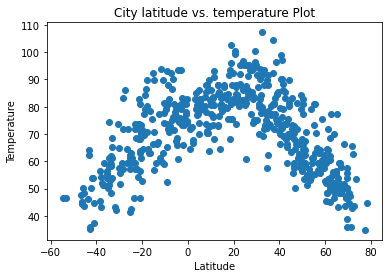

In [56]:
# Generate scatter lopt for Latitude vs. Temperature
lat_temp = cleaned.loc[:,['Lat', 'Max Temp']]

x= lat_temp['Lat']; y = lat_temp['Max Temp'];
plt.scatter(x,y)
plt.title("City latitude vs. temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('temp_plot.png', dpi=300, bbox_inches='tight')
plt.show()

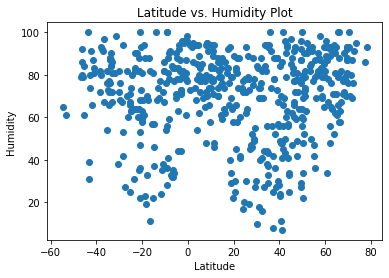

In [57]:
# Generate scatter lopt for  Latitude vs. Humidity Plot
lat_hum = cleaned.loc[:,['Lat', 'Humidity']]

x= lat_hum['Lat']; y = lat_hum['Humidity'];
plt.scatter(x,y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.savefig('hum_plot.png', dpi=300, bbox_inches='tight')
plt.show()

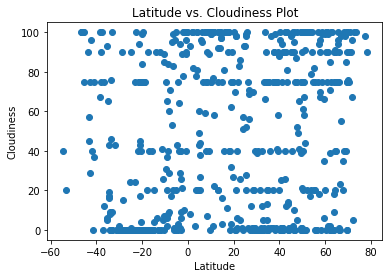

In [58]:
# Generate scatter lopt for Latitude vs. Cloudiness Plot
lat_clo = cleaned.loc[:,['Lat', 'Cloudiness']]

x= lat_clo['Lat']; y = lat_clo['Cloudiness'];
plt.scatter(x,y)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('clo_plot.png', dpi=300, bbox_inches='tight')
plt.show()

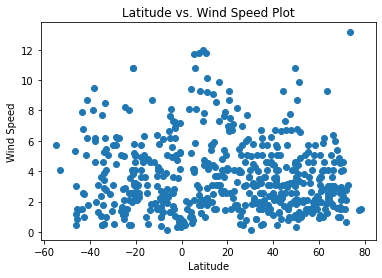

In [59]:
# Generate scatter lopt for Latitude vs. Wind Speed Plot
lat_win = cleaned.loc[:,['Lat', 'Wind Speed']]

x= lat_win['Lat']; y = lat_win['Wind Speed'];
plt.scatter(x,y)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('win_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
# Northern Hemisphere DataFrames
northern_hem = cleaned.loc[cleaned['Lat'] >= 0]

# Show dataframe 
northern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,goundam,16.41,-3.67,84.236,62,100,9.89,ML,1596488177
3,butaritari,3.07,172.79,82.904,74,2,8.08,KI,1596488470
6,anyang,36.10,114.33,77.036,91,98,2.10,CN,1596488472
7,lethem,3.38,-59.80,85.082,68,78,1.88,GY,1596488473
8,hobyo,5.35,48.53,78.656,72,27,11.71,SO,1596488473
...,...,...,...,...,...,...,...,...,...
547,tokmak,47.25,35.71,66.272,59,87,3.26,UA,1596488707
550,avera,33.19,-82.53,93.470,44,1,3.10,US,1596488709
552,axim,4.87,-2.24,73.940,80,49,4.12,GH,1596488709
553,shu,43.60,73.76,69.314,41,14,0.84,KZ,1596488709


In [61]:
# Southern Hemisphere DataFrames

southern_hem = cleaned.loc[cleaned['Lat'] <= 0]

#show dataframe 
southern_hem 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trelew,-43.25,-65.31,64.256,31,45,6.80,AR,1596488469
1,ushuaia,-54.80,-68.30,46.670,65,40,5.70,AR,1596488401
4,rikitea,-23.12,-134.97,73.760,83,24,8.02,PF,1596488329
5,puerto ayora,-0.74,-90.35,80.870,61,90,7.20,EC,1596488242
10,punta arenas,-53.15,-70.92,46.670,61,20,4.10,CL,1596488474
...,...,...,...,...,...,...,...,...,...
540,takaungu,-3.68,39.86,75.308,82,29,7.31,KE,1596488705
544,port-gentil,-0.72,8.78,77.270,78,40,5.17,GA,1596488472
548,lumeje,-11.55,20.78,59.738,35,41,1.85,AO,1596488708
549,saint-pierre,-21.34,55.48,68.270,82,75,10.80,RE,1596488543


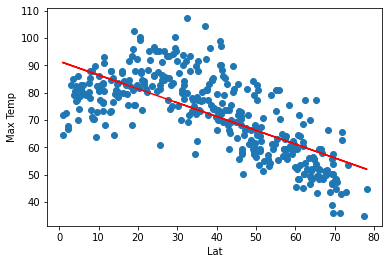

 The r-squared is: 0.4968454956126168


In [62]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

def len_regression(df, x_index, y_index, file_name):
    x_np_array = df.iloc[:, x_index].values
    y_np_array = df.iloc[:, y_index].values
    
    x = x_np_array.reshape(-1, 1)
    y = y_np_array.reshape(-1, 1)
    
    linear_regressor = LinearRegression() 
    linear_regressor.fit(x, y)
    y_pred = linear_regressor.predict(x)
    
    plt.xlabel(df.columns[x_index])
    plt.ylabel(df.columns[y_index])
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show() 
    # calculating r-squared and printing it 
    r_sq = r2_score(y, y_pred)
    print(f' The r-squared is: {r_sq}')

#calling function 
len_regression(northern_hem, 1, 3, "NorthernHem_max_temp")


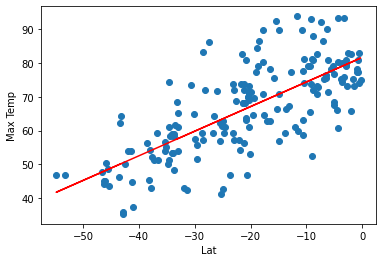

 The r-squared is: 0.5373006009338952


In [63]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression


#calling function 
len_regression(southern_hem, 1, 3, "SouthernHem_max_temp")


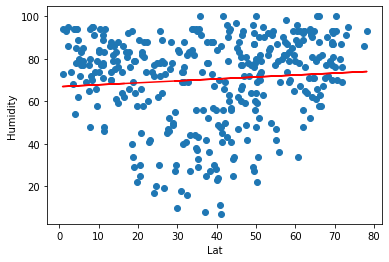

 The r-squared is: 0.007646215852939231


In [64]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem,1, 4, "Northern_Hem_Hum")



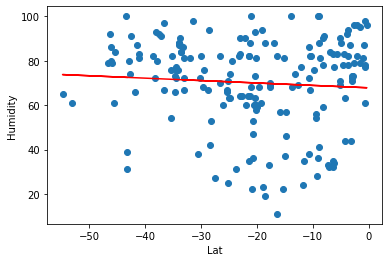

 The r-squared is: 0.005275090307713337


In [65]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem, 1, 4, "Southern_Hem_Hum")



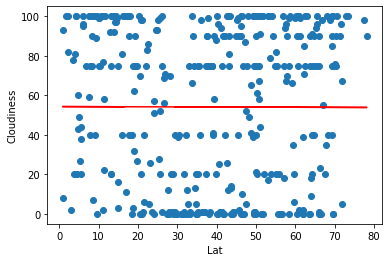

 The r-squared is: 8.622122677715005e-06


In [66]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem, 1, 5, "Northern_Hem_clo")



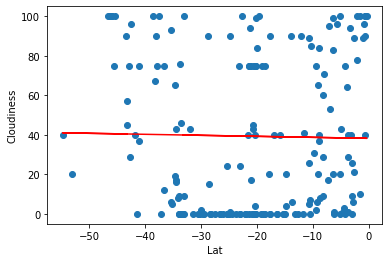

 The r-squared is: 0.0003212922844103572


In [67]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem, 1, 5, "Southern_Hem_clo")



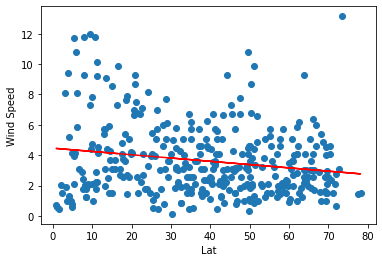

 The r-squared is: 0.03355967917863012


In [68]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem,1,6, "Northern_Hem_win")

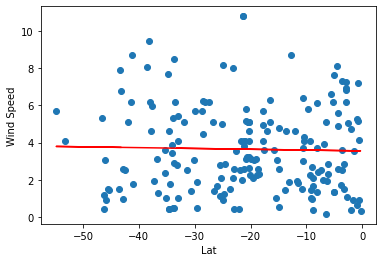

 The r-squared is: 0.0006609907156084338


In [69]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem,1,6, "Southern_hem_win")